In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

In [ ]:
drive.mount('/content/Drive')

Mounted at /content/Drive


Read Data

In [ ]:
train = pd.read_csv("/content/Drive/MyDrive/Sentiment Analys Data/train_data.csv")
title_brand = pd.read_csv('/content/Drive/MyDrive/Sentiment Analys Data/title_brand.csv')

<ipython-input-5-34e7b82d0d34>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/Drive/MyDrive/Sentiment Analys Data/train_data.csv")


In [ ]:
train.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


Type casting

In [ ]:
train['vote'] = train['vote'].str.replace(',','').astype(pd.Float64Dtype())
#train['reviewTime '] = pd.to_datetime(train['reviewTime'])
train['reviewerID'] = train['reviewerID'].astype(pd.StringDtype())
train['reviewerName'] = train['reviewerName'].astype(pd.StringDtype())
train['reviewText'] = train['reviewText'].astype(pd.StringDtype())
train['summary'] = train['summary'].astype(pd.StringDtype())

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         838944 non-null  int64  
 1   vote            98375 non-null   Float64
 2   verified        838944 non-null  bool   
 3   reviewTime      838944 non-null  object 
 4   reviewerID      838944 non-null  string 
 5   asin            838944 non-null  object 
 6   style           490613 non-null  object 
 7   reviewerName    838717 non-null  string 
 8   reviewText      838944 non-null  string 
 9   summary         838868 non-null  string 
 10  unixReviewTime  838944 non-null  int64  
dtypes: Float64(1), bool(1), int64(2), object(3), string(4)
memory usage: 65.6+ MB


## Task_1
Distrubation of overall

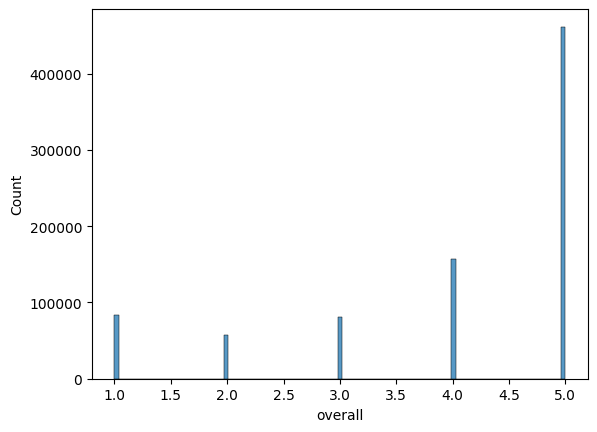

In [ ]:
sns.histplot(train['overall'])
plt.show()

## Task_2
Word cloud

In [ ]:
# Split data on overall
posetive_review = train[train.overall > 3].reviewText
negetive_review = train[train.overall < 3].reviewText
neutral_review = train[train.overall == 3].reviewText

# Make corpus
posetive_corpus = ' '.join(posetive_review)
negetive_corpus = ' '.join(negetive_review)
neutral_corpus = ' '.join(neutral_review)

In [ ]:
def my_word_cloud(text , title):
  # Create a word cloud
  wordcloud = WordCloud(background_color='white', stopwords=set(STOPWORDS))
  image = wordcloud.generate(text)
  wordcloud.to_file('/content/Drive/MyDrive/Sentiment Analys Data/'+title+'.jpg')
  # Display the word cloud
  plt.figure(figsize=(8,4),)
  plt.imshow(image, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.show()

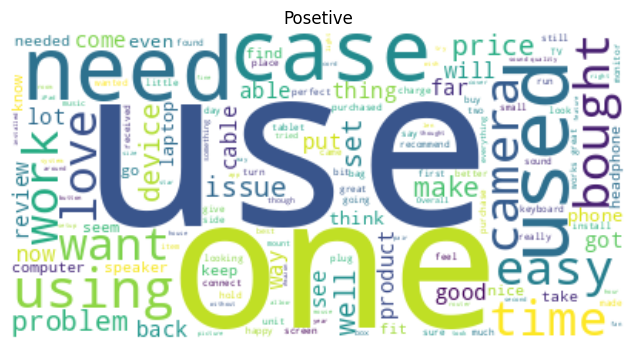

In [ ]:
my_word_cloud(posetive_corpus, 'Posetive')

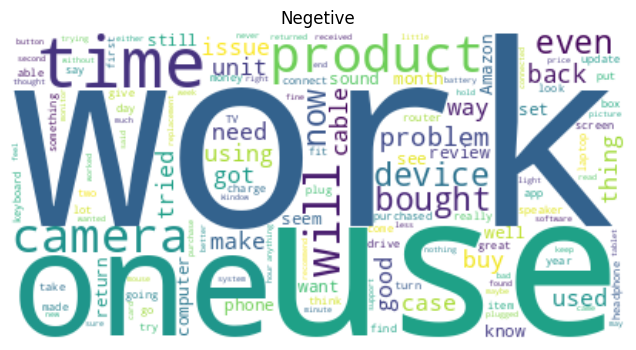

In [ ]:
my_word_cloud(negetive_corpus, 'Negetive')

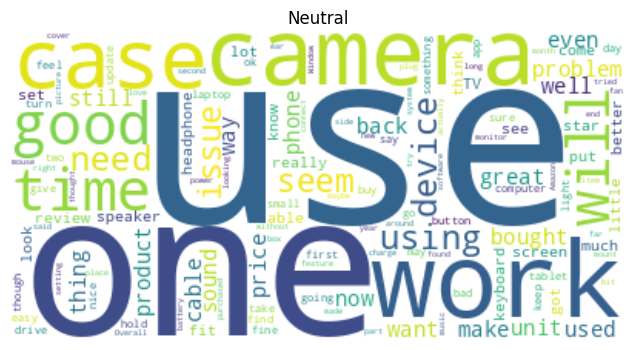

In [ ]:




 my_word_cloud(neutral_corpus, 'Neutral')

##Task_3
 Top ten of voting

In [ ]:
top_ten = train.groupby(['reviewerID','reviewerName']).agg({'vote':sum}).sort_values('vote', ascending=False).head(10)
top_ten.reset_index()[['reviewerName', 'vote']]

,reviewerName,vote
0,Benson Leung,4345.0
1,Voltron00x,3096.0
2,nycebo,2978.0
3,Mayra S.,2605.0
4,Cthulhu,2605.0
5,Obi Wan,2177.0
6,Chris Upton,2167.0
7,Sally B.,1912.0
8,Mark A. Baker,1820.0
9,avirtualcfo,1560.0


##Task_4
Histogram of reviewText length

All values

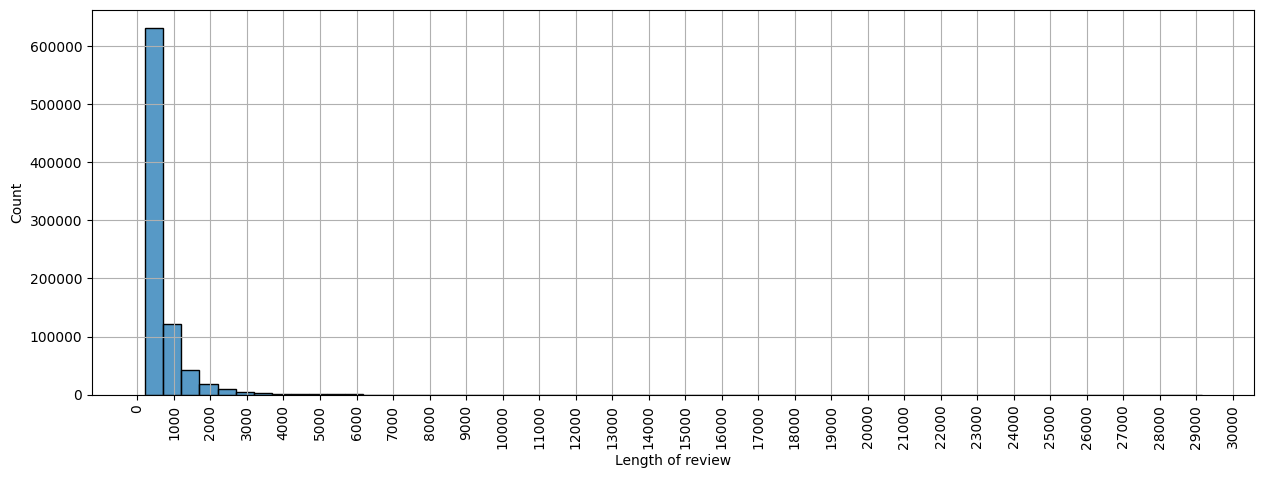

In [ ]:
X = train.reviewText.str.len()
plt.figure(figsize=(15,5))
sns.histplot(X, binwidth=500)
plt.xlabel('Length of review')
plt.xticks([x for x in range(0,int(plt.xlim()[1])+1 ,1000)],rotation = 90)
plt.grid()
plt.show()

In [ ]:
X.quantile([.25, .5, .75])

0.25    277.0
0.50    408.0
0.75    697.0
Name: reviewText, dtype: Float64

In [ ]:
X.min(),X.quantile(0.1),X.quantile(0.99),X.max()

(200, 227.0, 3399.0, 29146)

Values less than 3500

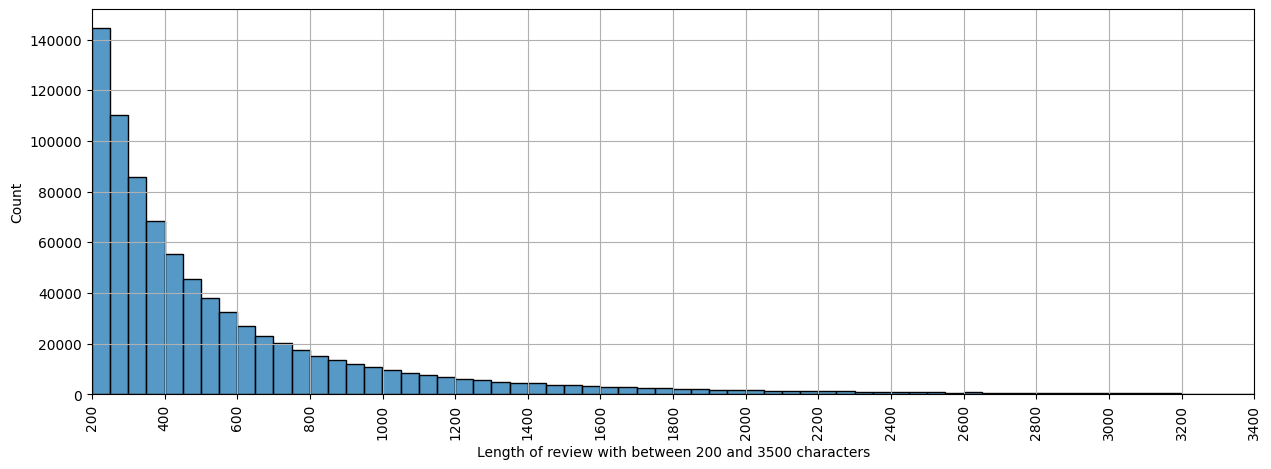

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(X[ X <3400], binwidth = 50)
plt.xlim((200,3400))
plt.xlabel('Length of review with between 200 and 3500 characters')
plt.xticks([x for x in range(200,3401,200)],rotation = 90)
plt.grid()
plt.show()


##Task_5
Product with maximum overall

In [ ]:
X = train [train.overall == 5][['asin']]
X = X.groupby(['asin']).agg(Number_overall_5=('asin',len))
X = X.sort_values('Number_overall_5', ascending = False).head(10)

#title_brand.head(5)

pd.merge(title_brand,X,how = 'inner', on = 'asin')[['title', 'brand', 'Number_overall_5']]

,title,brand,Number_overall_5
0,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,StarTech,598
1,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,VideoSecu,448
2,Logitech M570 Wireless Trackball Mouse &ndash;...,Logitech,552
3,NETGEAR N300 WiFi Range Extender (EX2700),NETGEAR,659
4,Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...,Samsung,431
5,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,Samsung,529
6,Arlo - Wireless Home Security Camera System | ...,"Arlo Technologies, Inc",433
7,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,Asus,471
8,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,Cambridge Soundworks,1163
9,Roku Streaming Stick (3600R) - HD Streaming Pl...,Roku,600


Getting brand and title with scraping

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# url = 'https://www.amazon.com/dp/'
# brands = []
# products_title = []
# for s in X.index:
#   response = requests.get(url+s)
#   html_content = response.content
#   soup = BeautifulSoup(html_content, 'html.parser')

#   try:
#     brand =soup.select('.a-spacing-small.po-brand .a-span9')[0].get_text().strip().lower()
#     brands.append(brand)
#   except:
#     brands.append(np.nan)

#   try:
#     title = soup.find('span',attrs={'id':'productTitle'}).get_text()
#     products_title.append(title)
#   except:
#     products_title.append(np.nan)

# X['Product_Title'] = products_title
# X['Brand']  = brands
# X['Brand']= X['Brand'].str.lower()
# X['Product_Title'] = X['Product_Title'].str.lower()
# X

##Task_6


In [ ]:
X = pd.merge(train[['asin','overall']], title_brand, how='inner', on = 'asin')
popular_brands =X.groupby('brand').size().sort_values(ascending = False)[0:10].index

X = X[X.brand.isin(popular_brands)].groupby(['brand']).agg(average_overall=('overall', np.average))
X.sort_values('average_overall')

,average_overall
brand,
NETGEAR,3.836274
Asus,3.855550
TP-LINK,3.928681
Sony,3.938726
Samsung,3.941268
Logitech,3.954061
SanDisk,3.958810
Sabrent,4.028005
AmazonBasics,4.201468
